<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Лабораторная-работа-3.-Обучение-без-учителя-(12-баллов)" data-toc-modified-id="Лабораторная-работа-3.-Обучение-без-учителя-(12-баллов)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Лабораторная работа 3. Обучение без учителя (12 баллов)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Оценивание-и-штрафы" data-toc-modified-id="Оценивание-и-штрафы-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Оценивание и штрафы</a></span></li></ul></li><li><span><a href="#EM-алгоритм-(4-балла)" data-toc-modified-id="EM-алгоритм-(4-балла)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>EM-алгоритм (4 балла)</a></span></li><li><span><a href="#Кластеризация-(5.4-балла)" data-toc-modified-id="Кластеризация-(5.4-балла)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Кластеризация (5.4 балла)</a></span><ul class="toc-item"><li><span><a href="#Выбор-числа-кластеров" data-toc-modified-id="Выбор-числа-кластеров-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Выбор числа кластеров</a></span></li><li><span><a href="#Метрики-качества" data-toc-modified-id="Метрики-качества-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Метрики качества</a></span></li></ul></li><li><span><a href="#Частичное-обучение-(2.6-балла)" data-toc-modified-id="Частичное-обучение-(2.6-балла)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Частичное обучение (2.6 балла)</a></span></li></ul></li></ul></div>

# Лабораторная работа 3. Обучение без учителя (12 баллов)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

## EM-алгоритм (4 балла)

   Рассмотрим модель смеси двух одномерных гауссовских распределений:
    $$p(x) = w_1N(x|\mu_1, \sigma_1^2) + w_2N(x|\mu_2, \sigma_2^2).$$
   Пусть дана выборка~$X^\ell = \{x_1, \dots, x_\ell\}$.

**Задание 1. (1.3 балла)** Докажите, что правдоподобие этой выборки в данной модели не ограничено.

**Задание 2. (2.7 балла)** Пусть дисперсии $\sigma_1^2$ и $\sigma_2^2$ известны. Введите в модель скрытые переменные и выведите формулы шагов EM-алгоритма для настройки параметров $w_1, w_2, \mu_1, \mu_2$.

## Кластеризация (5.4 балла)

![Digits](https://i.imgur.com/DINSGXS.png)

Задача [кластеризации](https://en.wikipedia.org/wiki/Cluster_analysis) данных является одним из примеров задач обучения "без учителя". Она заключается в разбиении множества объектов на кластеры, при этом предполагается, что внутри одного кластера будут находиться похожие между собой объекты. Одним из примеров методов кластеризации является алгоритм [KMeans](https://en.wikipedia.org/wiki/K-means_clustering).

### Выбор числа кластеров

Для некоторых алгоритмов кластеризации число кластеров является гиперпараметром (например, в случае KMeans). Поэтому для выбора количества кластеров может быть использован следующий подход: при фиксированной метрике качества для разного числа кластеров вычисляется кластеризация и выбирается то количество кластеров, начиная с которого качество "стабилизируется".

### Метрики качества

Оценивание качества построенной кластеризации не всегда тривиальная задача, так как следует учитывать такие факты как:
 - объекты одного кластера должны быть более похожи, чем объекты других кластеров, относительно некоторой заданной метрики похожести
 - метрика не должна учитывать абсолютные значения меток объектов, попавших в кластер (в случае, если истинные метки известны)

При выполнении задания для оценки качества получившейся кластеризации воспользуемся следующими метриками:
 - [Homogeneity и Completeness](http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure) 
 - [Adjusted Rand index](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) 
 - [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)

Загрузите набор данных [digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Перед применением алгоритмов не забудьте перемешать изображения.

In [3]:
import sklearn.datasets
data = sklearn.datasets.load_digits()

In [6]:
import numpy as np

In [8]:
order = np.arange(len(data.data))
np.random.shuffle(order)
X = data.data[order]
y = data.target[order]

In [10]:
X.shape

(1797, 64)

**Задание 3. (1.3 балла)** Кластеризуйте изображения при помощи алгоритма [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html): 
* Подберите число кластеров для некоторой фиксированной метрики из указанных выше. 
* Рассмотрите различные способы выбора начального приближения (параметр *init*). 
* Оцените качество получившейся кластеризации используя все описанные выше метрики. 
* Визуализируйте изображения, соответствующие центроидам лучшей кластеризации. 
* Визуализируйте несколько изображений, которые во всех случаях были отнесены к неправильному кластеру (объект назовем ошибочно отнесенным, если он имеет иную метку класса, нежели большая часть объектов в кластере). Можете ли вы пояснить почему так произошло?

In [11]:
from sklearn.cluster import KMeans

In [22]:
km = KMeans(10)

In [23]:
km_pred = km.fit_predict(X, y)

In [24]:
from sklearn import metrics
print(metrics.homogeneity_completeness_v_measure(y, km_pred))
print(metrics.adjusted_rand_score(y, km_pred))
print(metrics.silhouette_score(X, km_pred))

(0.7411277994824519, 0.7503540442709133, 0.7457123852929981)
0.6687378860161242
0.18254621979559807


In [25]:
km_pred

array([2, 8, 2, ..., 1, 6, 3])

In [27]:
centers = km.cluster_centers_

In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


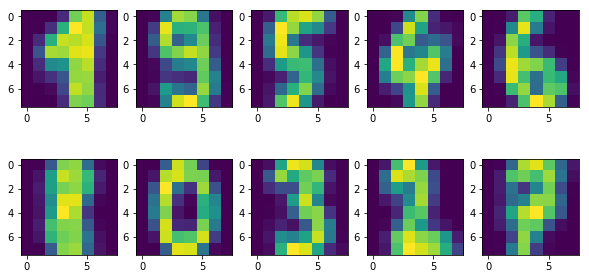

In [38]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for im, ax in zip(centers, axes.reshape((-1, ))):
    ax.imshow(im.reshape((8, 8)))

Не всегда бывает удобно работать с полной матрицей объект-признак, например, для случая визуализации данных. В одной из предыдущих лабораторных работ был рассмотрен метод уменьшения размерности *PCA*. Вот [здесь](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#example-manifold-plot-lle-digits-py) было показано сравнение различных способов сжатия размерности для проекции на плоскость. На изображениях видно, что некоторые преобразования дают неплохую картину и похожие объекты расположены близко друг к другу. Посмотрим, поможет ли это на практике.
 
**Задание 4. (3.4 балла)** Примените преобразования [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) и [tSNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) (для числа компонент 2), после чего подайте полученные представления объектов на вход алгоритмам KMeans, [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) и [Birch](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html). 
* Сравните новые и предыдущие результаты. 
* Нашлась ли пара "представление"—"алгоритм", превосходящая другие по всем метрикам? 
* Являются ли все три метрики согласованными? Можете ли вы объяснить почему?

**Задание 5. (0.7 балла)** Ответьте на следующие вопросы:
* В чём преимущества и недостаки каждого из рассмотренных алгоритмов кластеризации? Ответ обоснуйте.
* Приведите примеры данных, для которых использование каждого из алгоритмов будет наиболее обосновано с точки зрения качества и/или производительности? В этом задании будет достаточно описать какими должны быть данные, приводить примеры конкретных датасетов не нужно.

## Частичное обучение (2.6 балла)

![](https://i.imgur.com/C6HjiXq.png)

Качество unsupervised методов можно существенно улучшить, зная правильные ответы хотя бы для небольшой части выборки. Методы такого рода называются _частичным обучением (semi-supervised learning)_. Более подробно про реализацию таких методов в sklearn можно прочитать в разделе [semi-supervised](http://scikit-learn.org/stable/modules/label_propagation.html#semi-supervised).

Загрузите датасет [Wine](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) и создайте из него выборку, где для каждого класса имеется по одному объекту с известным ответом, а ответы на остальных объектах равны -1. 

**Задание 6. (1.4 балла)** Обучите [LabelSpreading](http://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html) на этих данных, рассмотрев различные значения параметра **kernel** (*knn*, *rbf*). Посчитайте качество полученной разметки для каждого класса (в качестве метрик используйте точность и полноту). 

**Задание 7. (0.6 балла)** Отобразите объекты вместе с верными и предсказанными ответами на двумерном графике, использовав [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) с 2 компонентами. 

**Задание 8. (0.6 балла)** Попробуйте запустить алгоритм несколько раз, отмечая известными различные объекты, посчитайте качество и визуализируйте результаты. Можно ли сказать что алгоритм сильно зависит от известных начальных объектов? Есть ли класс, для которого это больше всего заметно?